In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points = np.array(
    [
        [0, 0],
        [1, 0],
        [5.0, 5],
        [5.0, 8],
        [5.5, 10],
        [10, 0],
    ]
)

points2 = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 4.5],
        [1.51, 4.5],
    ]
)

In [3]:
import pprint
def plott(points):
    pprint.pprint(points)
    return
    plt.plot(*points.T)
    plt.scatter(*points.T)
    plt.gca().axis("equal")


#     plt.show()

plott(points)

array([[ 0. ,  0. ],
       [ 1. ,  0. ],
       [ 5. ,  5. ],
       [ 5. ,  8. ],
       [ 5.5, 10. ],
       [10. ,  0. ]])


In [4]:
constant_speed = 1


def transform_func(dist):
    return dist / constant_speed

def subdivide(points, target_segdist, include_last_pt=False, include_intermediate_pt=False):
    out = [points[0]]

    dist_leftover = 0.0
    for i in range(1, len(points)):
        dist_along_segment = transform_func(np.linalg.norm(points[i] - points[i - 1]))

        diff_vec = points[i] - points[i - 1]
        diff_mag = np.linalg.norm(diff_vec)
        diff_unit_vec = diff_vec / diff_mag
        # Check if adding the current segment exceeds the required distance for sampling
        while dist_leftover + dist_along_segment >= target_segdist:
            remaining_distance = target_segdist - dist_leftover

            if dist_leftover > 0:
                # left-over from last segment
                ratio = remaining_distance / dist_along_segment
                interpolated_point = points[i - 1] + ratio * diff_vec
            else:
                # purely from the current segment
                interpolated_point = out[-1] + diff_unit_vec * target_segdist

            # reset
            dist_leftover = 0.0
            out.append(interpolated_point)
            
            dist_along_segment -= remaining_distance

        # left over from this segment.
        dist_leftover += dist_along_segment
        
        if include_intermediate_pt and dist_leftover > 0:
            out.append(points[i])
            dist_leftover = 0

    
    if include_last_pt and dist_leftover > 0:
        out.append(points[-1])

    return np.array(out)


array([[ 0. ,  0. ],
       [ 1. ,  0. ],
       [ 5. ,  5. ],
       [ 5. ,  8. ],
       [ 5.5, 10. ],
       [10. ,  0. ]])
array([[0.        , 0.        ],
       [3.49878019, 3.12347524],
       [5.        , 7.59687576],
       [6.54040698, 7.68798448],
       [8.59223037, 3.12837695]])


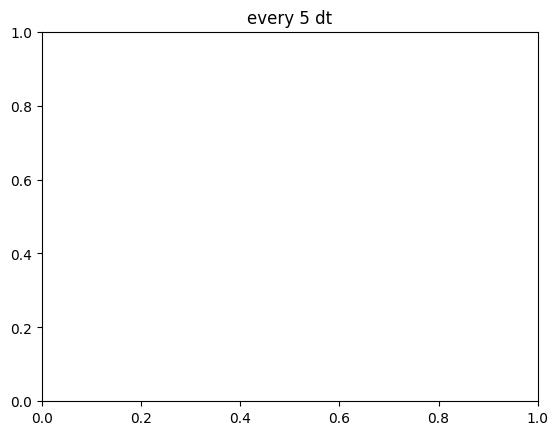

array([[ 0. ,  0. ],
       [ 1. ,  0. ],
       [ 5. ,  5. ],
       [ 5. ,  8. ],
       [ 5.5, 10. ],
       [10. ,  0. ]])
array([[0.        , 0.        ],
       [1.37481703, 0.46852129],
       [2.3743291 , 1.71791138],
       [3.37384118, 2.96730148],
       [4.37335326, 4.21669157],
       [5.        , 5.59687576],
       [5.        , 7.19687576],
       [5.19327076, 8.77308304],
       [5.63760469, 9.69421179],
       [6.29418818, 8.23513738],
       [6.95077166, 6.77606297],
       [7.60735515, 5.31698857],
       [8.26393863, 3.85791416],
       [8.92052211, 2.39883975],
       [9.5771056 , 0.93976534]])


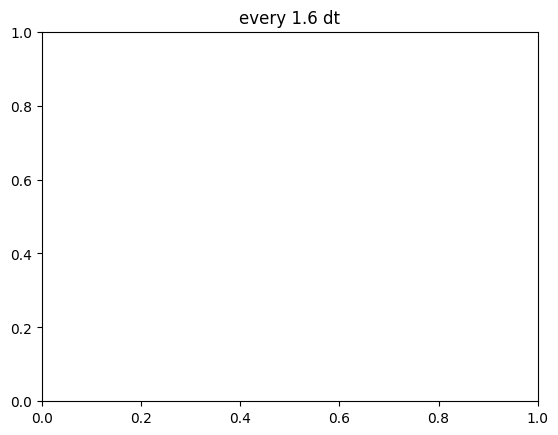

array([[ 0. ,  0. ],
       [ 1. ,  0. ],
       [ 5. ,  5. ],
       [ 5. ,  8. ],
       [ 5.5, 10. ],
       [10. ,  0. ]])
array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.99951208,  1.2493901 ],
       [ 2.99902415,  2.49878019],
       [ 3.99853623,  3.74817029],
       [ 4.9980483 ,  4.99756038],
       [ 5.        ,  5.        ],
       [ 5.        ,  6.6       ],
       [ 5.        ,  8.        ],
       [ 5.388057  ,  9.552228  ],
       [ 5.5       , 10.        ],
       [ 6.15658348,  8.54092559],
       [ 6.81316697,  7.08185118],
       [ 7.46975045,  5.62277678],
       [ 8.12633393,  4.16370237],
       [ 8.78291742,  2.70462796],
       [ 9.4395009 ,  1.24555355],
       [10.        ,  0.        ]])


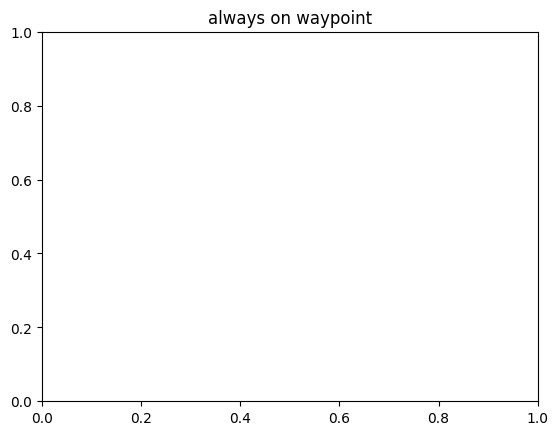

array([[0.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 4.5 ],
       [1.51, 4.5 ]])
array([[0.  , 0.  ],
       [0.75, 0.  ],
       [1.  , 0.5 ],
       [1.  , 1.25],
       [1.  , 2.  ],
       [1.  , 2.75],
       [1.  , 3.5 ],
       [1.  , 4.25],
       [1.5 , 4.5 ],
       [1.51, 4.5 ]])
array([[0.  , 0.  ],
       [0.73, 0.  ],
       [1.  , 0.46],
       [1.  , 1.19],
       [1.  , 1.92],
       [1.  , 2.65],
       [1.  , 3.38],
       [1.  , 4.11],
       [1.34, 4.5 ],
       [1.51, 4.5 ]])


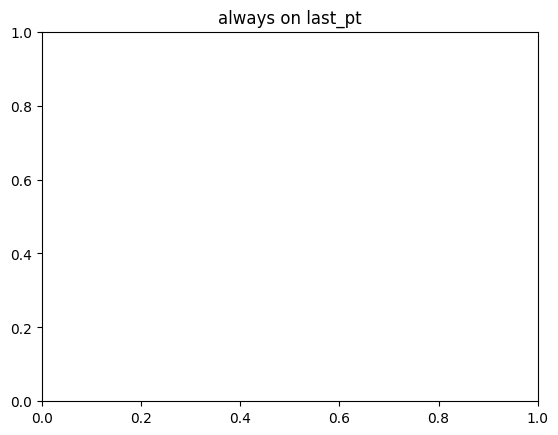

array([[0.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 4.5 ],
       [1.51, 4.5 ]])
array([[0.  , 0.  ],
       [0.73, 0.  ],
       [1.  , 0.46],
       [1.  , 1.19],
       [1.  , 1.92],
       [1.  , 2.65],
       [1.  , 3.38],
       [1.  , 4.11],
       [1.34, 4.5 ]])


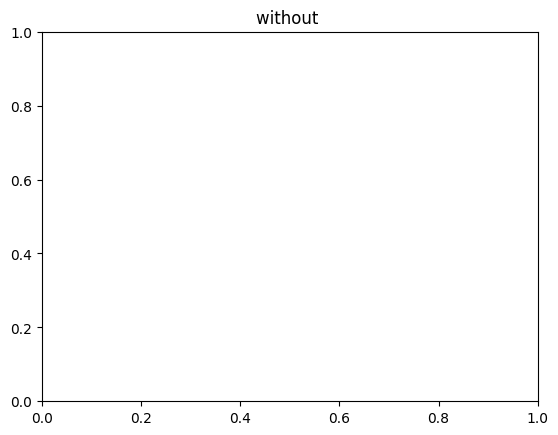

In [5]:
plott(points)
plott(subdivide(points, 5))
plt.title("every 5 dt")
plt.show()

plott(points)
plott(subdivide(points, 1.6))
plt.title("every 1.6 dt")
plt.show()


plott(points)
plott(subdivide(points, 1.6, include_intermediate_pt=True))
plt.title("always on waypoint")
plt.show()



plott(points2)
plott(subdivide(points2, .75, include_last_pt=True))
plott(subdivide(points2, .73, include_last_pt=True))
plt.title("always on last_pt")
plt.show()

plott(points2)
plott(subdivide(points2, .73))
plt.title("without ")
plt.show()
